# Ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
# !cd ~/git/Vancouver-Watching; pip3 install -e .

In [2]:
import os
import cv2
from abcli import file
from abcli.plugins.graphics.text import render_text
from abcli import fullname
from abcli.modules import objects
from abcli import string
from abcli.plugins import seed
from vancouver_watching.ai.classes import Ultralytics_API
import matplotlib.pyplot as plt

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2443.1-2023-06-aws-batch-a, built on 04 November 2023, 22:39:54


In [3]:
object_name = f"2023-11-04-21-42-46-47839"
object_path = objects.object_path(object_name)

In [4]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli download object $object_name

2023-11-04-21-42-46-47839 open download started.
2023-11-04-21-42-46-47839 download completed.


---

In [5]:
ultralytics_api = Ultralytics_API("R6nMlK6kQjSsQ76MPqQM")

Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


In [6]:
image_filename = os.path.join(object_path, "georgiaE.jpg")

In [7]:
response_dict = ultralytics_api.infer(image_filename)

car: 9, traffic light: 2
abcli.file.save_image(464x800x3:uint8) -> /Users/kamangir/storage/abcli/2023-11-04-21-42-46-47839/georgiaE-inference.jpg


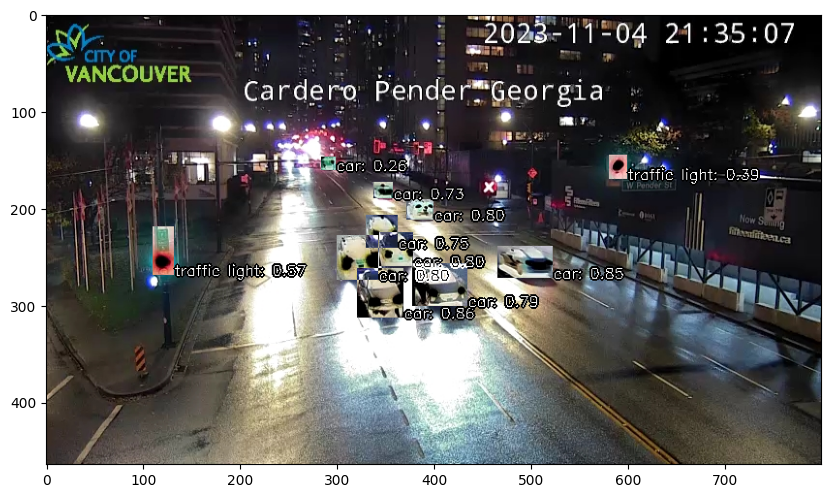

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.show()

---

In [9]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

📂 abcli: 2023-11-04-21-42-46-47839


2023-11-04-21-42-46-47839 += #built_by_notebook.


confirmed: 2023-11-04-21-42-46-47839 does not exist.
2023-11-04-21-42-46-47839 open upload started.
upload: ./georgiaE-inference.jpg to s3://kamangir/bolt/2023-11-04-21-42-46-47839/georgiaE-inference.jpg


2023-11-04-21-42-46-47839 += #open.


In [10]:
seed.log(object_name)

abcli select 2023-11-04-21-42-46-47839; open .


In [11]:
# END